# More Gravity
--------------
it still sucks

Today's Goals:
* Recap of Lab
* Gravity anomalies
* Gravity survey design

## Lab
What did we do?

* Learned how to take gravity measurements
* Connecting Relative and Absolute measurements
* Performed a simple survey

Goal: Measure the radius of the Earth

## Gravity Anomalies

Q: What does gravity data look like?

In [32]:
import numpy as np
from geoana import gravity
import matplotlib.pyplot as plt

In [33]:
x,y,z = np.mgrid[-100:100:256j,-100:100:256j, 0:1:1j]
x = x.squeeze()
y = y.squeeze()
z = z.squeeze()
xyz = np.stack([x, y, z], axis=-1)

### Isolated sources
Vertical gravity due to a point source at $\vec{r}=\left(x, y, z\right)$ observed at location $\vec{r}'=\left(x', y', z'\right)$:

$$ g_z(x', y') = \gamma\frac{(z-z')}{|\vec{r} - \vec{r}'|^3}$$

#### A note on coordinate systems used in gravity (and geophysics in general)
* Which directions correspond to $+\hat{x}$, $+\hat{y}$, $+\hat{z}$?
* Is it a right handed or left handed coordinate system?

Most geophysicsts like things simple:
* In gravity we often set $\hat{z}$ to be positive down, that way mass increases correspond to gravity increases.

**Q**? What about $x$ and $y$?

If we want to work in a right-handed coordinate system (which basically is where all of our calculus operators live), we set:
* $\hat{x}$ to be increasing towards the North
* $\hat{y}$ to be increasing towards the East
* $\hat{z}$ to be increasing with Depth.

**note**: Setting $\hat{x}$ to be East, $\hat{y}$ to be North, and $\hat{z}$ to be Depth would be a Left-handed coordinate system.

### Back to the "point"

In [86]:
source = gravity.PointMass(mass=1E5, location=[0, 0, 25])
gv = source.gravitational_field(xyz) * 1E8

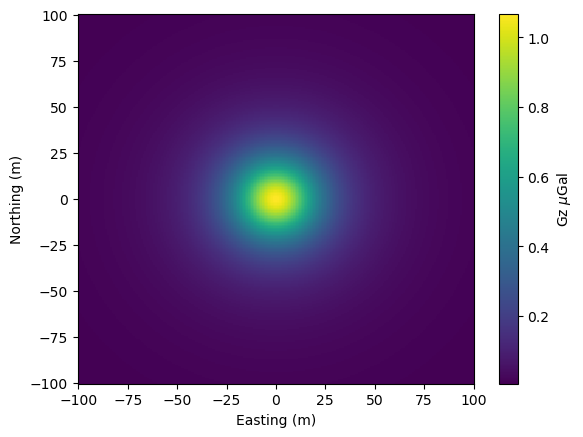

In [87]:
plt.pcolormesh(x, y, gv[...,2]);
cb = plt.colorbar();
plt.xlabel('Easting (m)');
plt.ylabel("Northing (m)");
cb.set_label(r'Gz $\mu$Gal');

Q: What are components are these, under a RHS with $\hat{z}$ positive down?

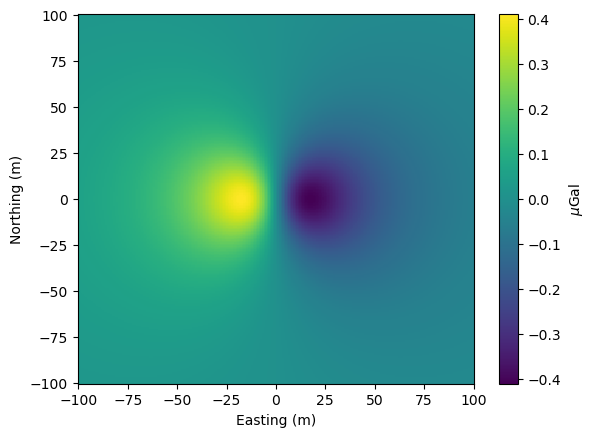

In [53]:
plt.pcolormesh(x, y, gv[...,0]);
cb = plt.colorbar();
plt.xlabel('Easting (m)');
plt.ylabel("Northing (m)");
cb.set_label(r'$\mu$Gal');

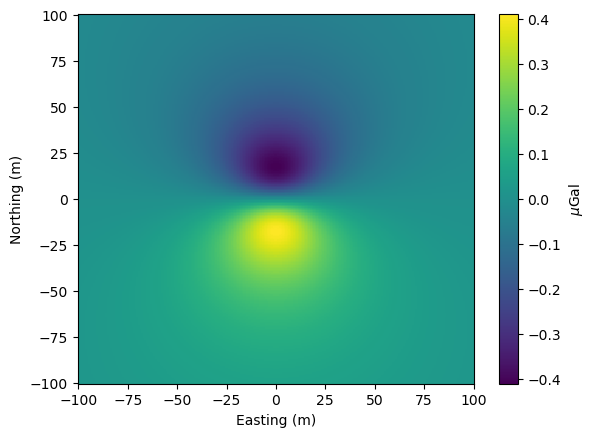

In [54]:
plt.pcolormesh(x, y, gv[...,1]);
cb = plt.colorbar();
plt.xlabel('Easting (m)');
plt.ylabel("Northing (m)");
cb.set_label(r'$\mu$Gal');

## Other sources:
Gravity is a linear system, described by a linear PDE simply:

$$ \nabla \phi = 4\pi\gamma\rho$$

Therefore sum of the solution for multiple masses (a.k.a. multiple RHS of the above equation) is the same as the solution for the sum of multiple masses.

**Superposition**
Literally for elongated bodies you can just integrate (sum) them all together!

Adding multiple masses:

$$ g_z(x', y') = \gamma \sum_i m_i\frac{z_i - z'}{|\vec{r}_i - \vec{r}'|^3} $$

Or for distruted masses:
$$ g_z(x', y') = \gamma \int_V \rho(\vec{r})\frac{z - z'}{|\vec{r} - \vec{r}'|^3}\partial V $$

## Elongated bodies:

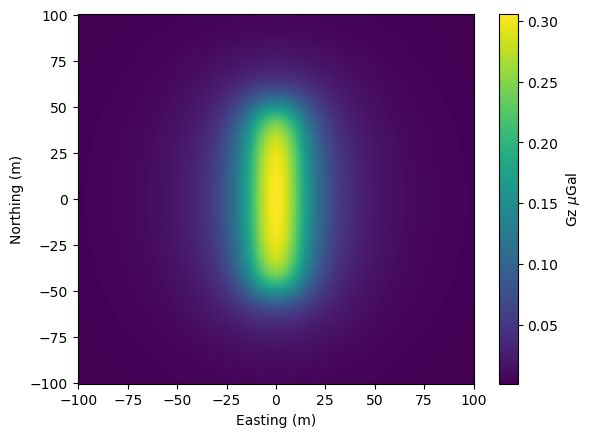

In [68]:
prism = gravity.Prism([-10, -50, -20],[10, 50, -10], rho=2.)
gv_prism = prism.gravitational_field(xyz)
plt.pcolormesh(x, y, -gv_prism[...,2]*1E8);
cb = plt.colorbar();
plt.xlabel('Easting (m)');
plt.ylabel("Northing (m)");
cb.set_label(r'Gz $\mu$Gal');

Basically:

Vertical gravity anomalies (along a plane) **look** like smoothed versions of the horizontal variations in density.

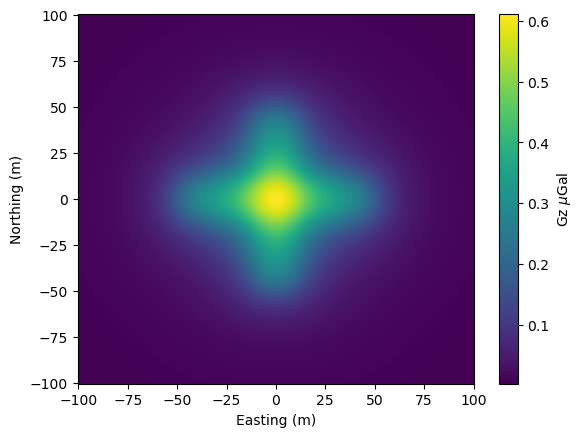

In [70]:
prism2 = gravity.Prism([-50, -10, -20],[50, 10, -10], rho=2.)
gv_prism2 = prism2.gravitational_field(xyz) + gv_prism
plt.pcolormesh(x, y, -gv_prism2[...,2]*1E8);
cb = plt.colorbar();
plt.xlabel('Easting (m)');
plt.ylabel("Northing (m)");
cb.set_label(r'Gz $\mu$Gal');

### Profiles
It is common to collect profiles of gravity data

Q: If this was your gravity field, which direction would you orient your survey lines?

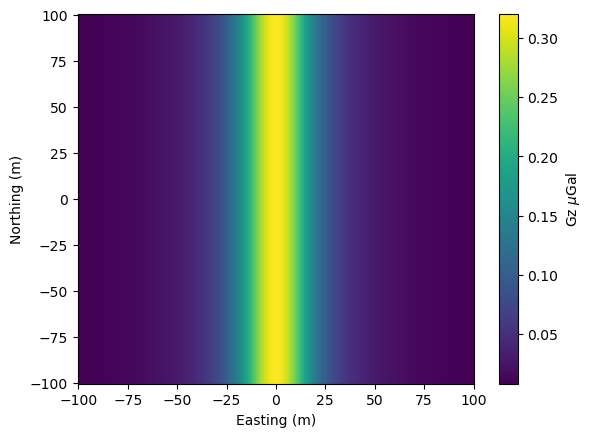

In [71]:
prism = gravity.Prism([-10, -1000, -20],[10, 1000, -10], rho=2.)
gv_prism = prism.gravitational_field(xyz)
plt.pcolormesh(x, y, -gv_prism[...,2]*1E8);
cb = plt.colorbar();
plt.xlabel('Easting (m)');
plt.ylabel("Northing (m)");
cb.set_label(r'Gz $\mu$Gal');

* Orient it along the direction it is changing!
* Perpendicular to strike (parallel to the dip)

### 2D earths
We often call this a "2D" model, as the geometry is only variable in two dimensions:
* along profile
* with depth.

In [80]:
xp,yp,zp = np.mgrid[-100:100:256j,0:1:1j, 0:1:1j]
xp = xp.squeeze()
yp = yp.squeeze()
zp = zp.squeeze()
xyzp = np.stack([xp,yp,zp], axis=-1)

(256, 3)

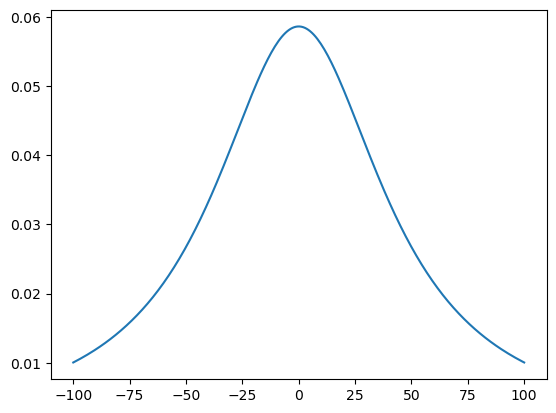

In [93]:
prism3 = gravity.Prism([-10,-100000,-50],[10,100000,-40])
gv_p = prism3.gravitational_field(xyzp)
plt.plot(xp, -gv_p[:, -1] * 1E8)

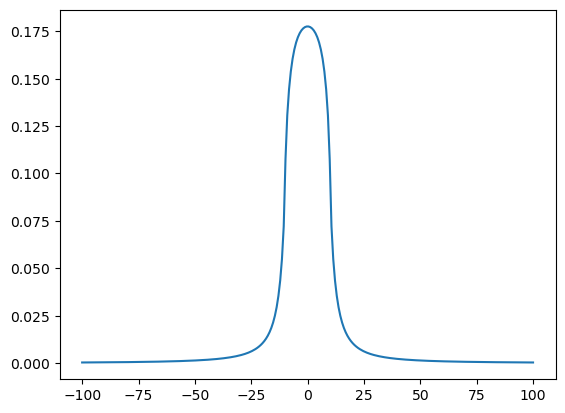

Q? How does the shape of this anomaly change with depth?

## Drift Corrections
* Just a small bit on processing gravity data (as relevant to survey design)

Gravity changes in time.

### Tidal effects
* both the sun and moon exert gravitational force
* varies with the time because of the location of the sun and moon

![SunMoon](resources/tidal_example.png)

Rigid Earth

Real earth:
* both the water body and solid mass are deformed to produce additional gravity change;
* Effect magnified by a factor of about 1.16


### At a single location:
Observed tidal effect
* This temporal component is not related to geology and must be removed from the observation.
* Large scale or stationary survey can be corrected by this analytic formula.
* Smaller scale survey is often corrected together with instrument drift by using repeated measurements at a single station.

![gravity variations](resources/tidal_change.png)

* Base station is essential for most surveys
* It can be located off of your survey line/grid and simply used for corrections
* Often, the base station is a part of your survey line/grid, and it would be the first point
* Time to return to base station: varies…let’s discuss

![corr](resources/drift_correction.png)

Correction method:
* approximate the drift curve by line segments
* remove the difference between the value
     * of a given point on drift curve and the 
     * value of the first point.

* calculate by linear interpolation: if the
     * time of a station reading falls between
     * i’th and (i+1)’th base-station reading,

Linear Interpolation:
$$ f_{interp}(x) = \frac{f_2 - f_1}{x_2 - x_1}(x - x_1) + f_1 $$

Evaluate at the appropriate time, and subtract it!

# Density and Density Contrasts

What are densites of common materials?